<a href="https://colab.research.google.com/github/TeinkBR/Simulation-Physics-Course/blob/main/Comparing_three_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implement and compare Euler, symplectic Euler and Velocity Verlet) 

For a 1-d harmonic oscillator, i.e. for the system with the Hamiltonian (we set the mass and frequency equal to 1)

$H = \frac{p^2}{2} + \frac{x^2}{2}$

Plot the trajectory for all different integrators for a total time of T=100 and different time steps $\triangle{t}$ = 0.001, 0.01, 0.1 and compare them with regards to stability.
You should also plot the total energy for these different simulation runs as a function of time. 

We take derivative of Hamiltonian by time variable $t$:
$
\frac{d H}{dt}= 2\frac{\partial p}{\partial t} + 2 \frac{\partial x}{\partial t}
$

As we know, for $p$ we have, (set $m=1$):

$
p=  v= \frac{d x}{dt} 
$


We can use the Euler, step Euler and velocity verlet integrator to calcualate energy and test the stability of the algorithms.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#setup the notebook
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['eigh']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from scipy.linalg import eigh

Initialize harmonic oscillator energy force (potential) and plot the potential trap

## This part is analycially showing us how does the harmonic oscillator looks like, as well as making a function of hamornic oscillator potential which we will use for our alogorithms later

In [17]:
#this function returns the energy and force on a particle from a harmonic potential
def harmonic_oscillator_energy_force(x,k=1,x0=0):
    #calculate the energy on force on the right hand side of the equal signs
    energy = 0.5*k*(x-x0)**2
    force = -k*(x-x0)
    return energy, force

# define a plot function 
def plot_energy_force(function, xmin=-3,xmax=3,spacing=0.1,**kwargs):
    x_points = np.arange(xmin,xmax+spacing,spacing)
    energies, forces = function(x_points,**kwargs)
    label = 'U(x)'
    for arg in kwargs:
        label=label+', %s=%s'%(arg,str(kwargs[arg]))
    #p = plt.plot(x_points,energies,label=label)
    plt.plot(x_points,energies,label='')
    plt.legend(loc=0)

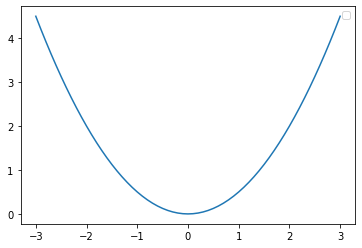

In [18]:
# plot the harmonic oscillator trap
plot_energy_force(harmonic_oscillator_energy_force,k=1)

## How does hamornic oscillator motion looks analytically

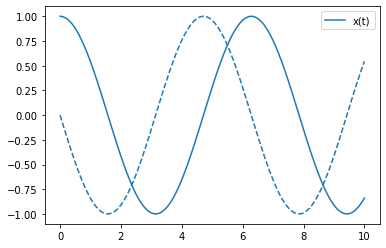

In [19]:
#fill in the formulas below. remember, to get trig functions you have to do things like np.cos()

def harmonic_oscillator_position_velocity(t, A=1, omega=1, phi=0):
    position = A*np.cos(omega*t+phi)
    velocity = -A*omega*np.sin(omega*t+phi)
    
    return position, velocity

#this function will plot the energy and force for a harmonic oscilator
def plot_harmonic_oscillator(t_max=10,dt=0.1,**kwargs):
    t_points = np.arange(0,t_max+dt,dt)
    position, velocity = harmonic_oscillator_position_velocity(t_points,**kwargs)
    label = 'x(t)'
    for arg in kwargs:
        label=label+', %s=%s'%(arg,str(kwargs[arg]))
    p = plt.plot(t_points,position,label=label)
    plt.plot(t_points,velocity,label='',color=p[0].get_color(),linestyle='--')
    plt.legend(loc='upper right')
    
#if it is working, you will get a plot with position as a solid line and velocity as dashed
plot_harmonic_oscillator()

## velocity verlet algorithm

In [46]:
def position_update_verlet(x,v,F,dt):
    x_new = x + dt*v + 0.5*dt*dt*F
    return x_new

def velocity_update_verlet(v,F_new,F_old,dt):
    v_new = v + 0.5*dt*(F_old+F_new)
    return v_new

#this function will take the initial energy as an input and run velocity verlet dynamics
def velocity_verlet_harmonic_oscillator(potential, max_time, dt, initial_position, initial_velocity,
                                        save_frequency=3, **kwargs ):
    x = initial_position
    v = initial_velocity
    t = 0
    step_number = 0
    positions = []
    velocities = []
    total_energies = []
    save_times = []
    
    while(t<max_time):
        potential_energy, force = potential(x,**kwargs)
        if step_number%save_frequency == 0:
            e_total = 0.5*v*v + 0.5*x*x

            positions.append(x)
            velocities.append(v)
            total_energies.append(e_total)
            save_times.append(t)
        
        # update the positions
        x = position_update_verlet(x,v,force,dt)
        # recompute the energy and force
        potential_energy2, force2 = potential(x,**kwargs)
        # update the velocity
        v = velocity_update_verlet(v,force2,force,dt)
                
        t = t+dt
        step_number = step_number + 1
    
    return save_times, positions, velocities, total_energies

## Symplectic euler

In [45]:
def position_update_symplectic_euler(x,v,F,dt):
    x_new = x + dt*v + 0.5*dt*dt*F
    return x_new

def velocity_symplectic_euler(v,F_new,F_old,dt):
    v_new = v + 0.5*dt*(F_old+F_new)
    return v_new


def step_symplectic_euler(potential, max_time, dt, initial_position, initial_velocity,
                                        save_frequency=3, **kwargs ):
    x = initial_position
    v = initial_velocity
    t = 0
    step_number = 0
    positions = []
    velocities = []
    total_energies = []
    save_times = []
    

  

    while(t<max_time):
        potential_energy, force = potential(x,**kwargs)
        if step_number%save_frequency == 0:
            e_total = 0.5*v*v + 0.5*x*x

            positions.append(x)
            velocities.append(v)
            total_energies.append(e_total)
            save_times.append(t)
        

        # compute the energy and force
        potential_energy2, force2 = potential(x,**kwargs)
        # update the velocity
        v = velocity_symplectic_euler(v,force2,force,dt)
        # update the positions
        x = position_update_symplectic_euler(x,v,force,dt)
        
        
                
        t = t+dt
        step_number = step_number + 1
    
    return save_times, positions, velocities, total_energies

## Step euler

In [85]:
def position_update_step_euler(x,v,F,dt):
    x_new = x + dt*v
    return x_new

def velocity_step_euler(v,F_new,F_old,dt):
    v_new = v + dt*(F_old+F_new)
    return v_new


def step_euler(potential, max_time, dt, initial_position, initial_velocity,
                                        save_frequency=3, **kwargs ):
    
    x = initial_position
    v = initial_velocity
    t = 0
    step_number = 0
    positions = []
    velocities = []
    total_energies = []
    save_times = []
    

  

    while(t<max_time):
        potential_energy, force = potential(x,**kwargs)
        if step_number%save_frequency == 0:
            e_total = 0.5*v*v + 0.5*x*x

            positions.append(x)
            velocities.append(v)
            total_energies.append(e_total)
            save_times.append(t)
          
          # update the positions
        x = position_update_step_euler(x,v,force,dt)
        # update the velocity
        v = velocity_step_euler(v,force,force,dt)
       
        # recompute the energy and force

        potential_energy2, force2 = potential(x,**kwargs)
        
       
        
                
        t = t+dt
        step_number = step_number + 1
    
    return save_times, positions, velocities, total_energies

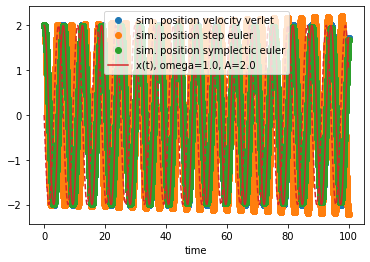

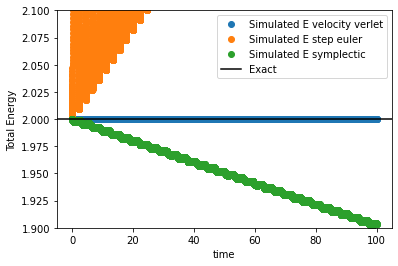

In [86]:
initial_energy = 2
my_k = 1
#let's set T=100
my_max_time = 100

#set the initial conditions. this is easiest if you set x=x_max and v=0 based on the input energy E. 
# Otherwise you will have to include a phase factor to show that you got the exact solution

initial_position = np.sqrt(2*initial_energy/my_k)
initial_velocity = 0


my_omega = np.sqrt(my_k)
#tau = 2*np.pi/my_omega

my_dt=0.001

times_verlet, positions_verlet, velocities_verlet, total_energies_verlet = velocity_verlet_harmonic_oscillator(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)


times_step_euler, positions_step_euler, velocities_step_euler, total_energies_step_euler = step_euler(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)

times_symplectic_euler, positions_symplectic_euler, velocities_symplectic_euler, total_energies_symplectic_euler = step_symplectic_euler(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)

# What is the A value prefactor for the harmonic oscillator? See equations above


my_A = np.sqrt(initial_energy*2/my_k)

plt.plot(times_verlet,positions_verlet,marker='o',label='sim. position velocity verlet',linestyle='')
plt.plot(times_step_euler,positions_step_euler,marker='o',label='sim. position step euler',linestyle='')
plt.plot(times_symplectic_euler,positions_symplectic_euler,marker='o',label='sim. position symplectic euler',linestyle='')


plot_harmonic_oscillator(t_max=my_max_time,omega=my_omega, A=my_A)

plt.xlabel('time')
plt.legend(loc='upper center')

plt.figure()

plt.plot(times_verlet,total_energies_verlet,marker='o',linestyle='',label='Simulated E velocity verlet')
plt.plot(times_step_euler,total_energies_step_euler,marker='o',linestyle='',label='Simulated E step euler')
plt.plot(times_symplectic_euler,total_energies_symplectic_euler,marker='o',linestyle='',label='Simulated E symplectic')

plt.axhline(initial_energy,color='black',label='Exact')
plt.ylim(0.95*initial_energy,1.05*initial_energy)
plt.xlabel('time')
plt.ylabel("Total Energy")
plt.legend()

## Now we make an error plot to see how stable different algorithm is

In [82]:
print(np.array(initial_energy))

2


In [79]:
diff_step_euler_verlet=np.array(total_energies_step_euler)-np.array(initial_energy)
diff_symplectic_euler_verlet=np.array(total_energies_symplectic_euler)-np.array(initial_energy)
diff_verlet=np.array(total_energies_verlet)-np.array(initial_energy,)

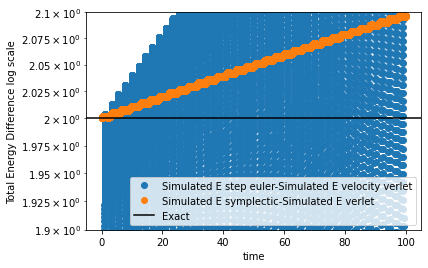

In [80]:
plt.plot(times_verlet,np.abs(diff_step_euler_verlet),marker='o',linestyle='',label='Simulated E step euler-Simulated E velocity verlet')
plt.plot(times_symplectic_euler,np.abs(diff_symplectic_euler_verlet-total_energies_verlet),marker='o',linestyle='',label='Simulated E symplectic-Simulated E verlet')

plt.ylim(0.95*initial_energy,1.05*initial_energy)
plt.yscale('log')
plt.xlabel('time')
plt.ylabel("Total Energy Difference log scale")
plt.legend()

## For dt = 0.01

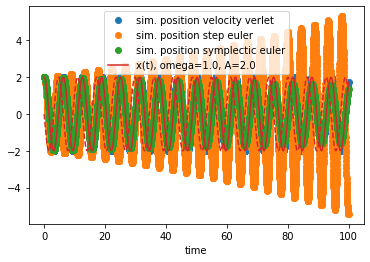

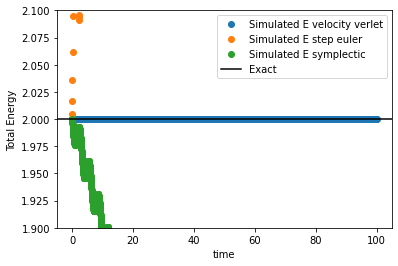

In [87]:
initial_energy = 2
my_k = 1
#let's set T=100
my_max_time = 100

#set the initial conditions. this is easiest if you set x=x_max and v=0 based on the input energy E. 
# Otherwise you will have to include a phase factor to show that you got the exact solution

initial_position = np.sqrt(2*initial_energy/my_k)
initial_velocity = 0


my_omega = np.sqrt(my_k)
#tau = 2*np.pi/my_omega

my_dt=0.01

times_verlet, positions_verlet, velocities_verlet, total_energies_verlet = velocity_verlet_harmonic_oscillator(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)


times_step_euler, positions_step_euler, velocities_step_euler, total_energies_step_euler = step_euler(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)

times_symplectic_euler, positions_symplectic_euler, velocities_symplectic_euler, total_energies_symplectic_euler = step_symplectic_euler(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)

# What is the A value prefactor for the harmonic oscillator? See equations above


my_A = np.sqrt(initial_energy*2/my_k)

plt.plot(times_verlet,positions_verlet,marker='o',label='sim. position velocity verlet',linestyle='')
plt.plot(times_step_euler,positions_step_euler,marker='o',label='sim. position step euler',linestyle='')
plt.plot(times_symplectic_euler,positions_symplectic_euler,marker='o',label='sim. position symplectic euler',linestyle='')


plot_harmonic_oscillator(t_max=my_max_time,omega=my_omega, A=my_A)

plt.xlabel('time')
plt.legend(loc='upper center')

plt.figure()

plt.plot(times_verlet,total_energies_verlet,marker='o',linestyle='',label='Simulated E velocity verlet')
plt.plot(times_step_euler,total_energies_step_euler,marker='o',linestyle='',label='Simulated E step euler')
plt.plot(times_symplectic_euler,total_energies_symplectic_euler,marker='o',linestyle='',label='Simulated E symplectic')

plt.axhline(initial_energy,color='black',label='Exact')
plt.ylim(0.95*initial_energy,1.05*initial_energy)
plt.xlabel('time')
plt.ylabel("Total Energy")
plt.legend()

## For dt=0.1

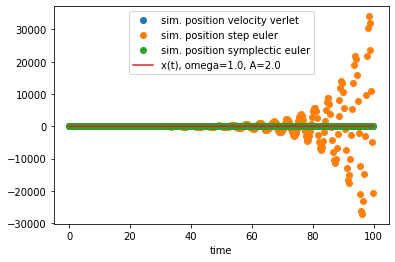

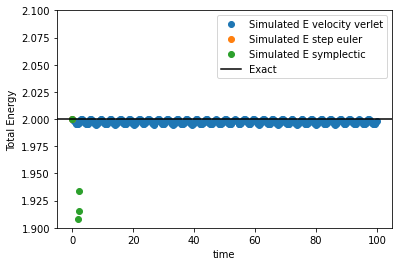

In [88]:
initial_energy = 2
my_k = 1
#let's set T=100
my_max_time = 100

#set the initial conditions. this is easiest if you set x=x_max and v=0 based on the input energy E. 
# Otherwise you will have to include a phase factor to show that you got the exact solution

initial_position = np.sqrt(2*initial_energy/my_k)
initial_velocity = 0


my_omega = np.sqrt(my_k)

my_dt=0.1

times_verlet, positions_verlet, velocities_verlet, total_energies_verlet = velocity_verlet_harmonic_oscillator(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)


times_step_euler, positions_step_euler, velocities_step_euler, total_energies_step_euler = step_euler(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)

times_symplectic_euler, positions_symplectic_euler, velocities_symplectic_euler, total_energies_symplectic_euler = step_symplectic_euler(harmonic_oscillator_energy_force, 
                                                                            my_max_time, my_dt, \
                                                                            initial_position, initial_velocity,\
                                                                             k=my_k)

# What is the A value prefactor for the harmonic oscillator? See equations above


my_A = np.sqrt(initial_energy*2/my_k)

plt.plot(times_verlet,positions_verlet,marker='o',label='sim. position velocity verlet',linestyle='')
plt.plot(times_step_euler,positions_step_euler,marker='o',label='sim. position step euler',linestyle='')
plt.plot(times_symplectic_euler,positions_symplectic_euler,marker='o',label='sim. position symplectic euler',linestyle='')


plot_harmonic_oscillator(t_max=my_max_time,omega=my_omega, A=my_A)

plt.xlabel('time')
plt.legend(loc='upper center')

plt.figure()

plt.plot(times_verlet,total_energies_verlet,marker='o',linestyle='',label='Simulated E velocity verlet')
plt.plot(times_step_euler,total_energies_step_euler,marker='o',linestyle='',label='Simulated E step euler')
plt.plot(times_symplectic_euler,total_energies_symplectic_euler,marker='o',linestyle='',label='Simulated E symplectic')

plt.axhline(initial_energy,color='black',label='Exact')
plt.ylim(0.95*initial_energy,1.05*initial_energy)
plt.xlabel('time')
plt.ylabel("Total Energy")
plt.legend()